In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import math

pd.set_option ('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, train_test_split

from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
train_df = pd.read_csv(r"C:\Users\QB183AP\OneDrive - EY\Documents\Machine Learning\client_attrition_train.csv")
print(train_df.shape)
train_df.head()

(10127, 21)


,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.00,F,2,High School,Married,40-60K,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open
1,568093,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed
2,595389,43.00,M,1,High School,Married,80-120K,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open
3,287252,46.00,F,4,High School,Married,below 40K,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open
4,231901,40.00,M,4,High School,Single,80-120K,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open


In [4]:
missing_percentages = train_df.isnull().sum()/len(train_df)
missing_percentages[missing_percentages>0]

customer_age               0.06
customer_sex               0.10
customer_salary_range      0.07
total_transaction_amount   0.04
dtype: float64

In [5]:
# check missing values in train data
train_df.isnull().sum()

customer_id                           0
customer_age                        624
customer_sex                       1018
customer_number_of_dependents         0
customer_education                    0
customer_civil_status                 0
customer_salary_range               681
customer_relationship_length          0
customer_available_credit_limit       0
credit_card_classification            0
total_products                        0
period_inactive                       0
contacts_in_last_year                 0
credit_card_debt_balance              0
remaining_credit_limit                0
transaction_amount_ratio              0
total_transaction_amount            407
total_transaction_count               0
transaction_count_ratio               0
average_utilization                   0
account_status                        0
dtype: int64

In [6]:
train_df["customer_sex"] = train_df["customer_sex"].fillna(train_df["customer_sex"].mode().iloc[0])

In [7]:
train_df["customer_salary_range"] = train_df["customer_salary_range"].fillna(train_df["customer_salary_range"].mode().iloc[0])

count   9503.00
mean      46.32
std        8.00
min       26.00
10%       36.00
25%       41.00
50%       46.00
75%       52.00
90%       57.00
99%       65.00
max       73.00
Name: customer_age, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_5708\1022126773.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['customer_age'], color='g', bins=100, hist_kws={'alpha': 0.4});


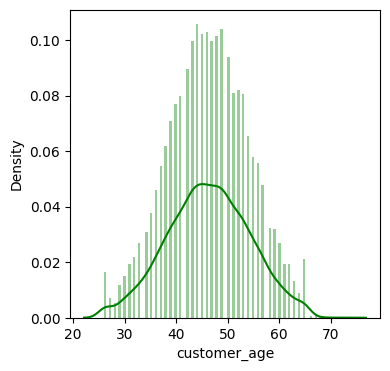

In [8]:
print(train_df['customer_age'].describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(train_df['customer_age'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [9]:
train_df["customer_age"] = train_df["customer_age"].fillna(train_df["customer_age"].mode().iloc[0])

count     9720.00
mean      5253.71
std       7402.26
min        510.00
10%       1514.00
25%       2196.00
50%       3971.00
75%       4823.00
90%      10201.50
99%      31174.36
max     117159.00
Name: total_transaction_amount, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_5708\3550785864.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['total_transaction_amount'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='total_transaction_amount', ylabel='Density'>

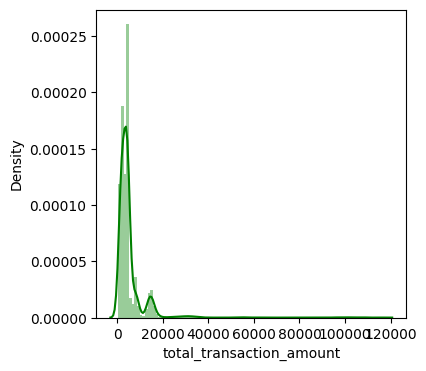

In [10]:
print(train_df['total_transaction_amount'].describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(train_df['total_transaction_amount'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [11]:
train_df["total_transaction_amount"] = train_df["total_transaction_amount"].fillna(train_df["total_transaction_amount"].mode().iloc[0])

In [12]:
train_df.isna().sum()

customer_id                        0
customer_age                       0
customer_sex                       0
customer_number_of_dependents      0
customer_education                 0
customer_civil_status              0
customer_salary_range              0
customer_relationship_length       0
customer_available_credit_limit    0
credit_card_classification         0
total_products                     0
period_inactive                    0
contacts_in_last_year              0
credit_card_debt_balance           0
remaining_credit_limit             0
transaction_amount_ratio           0
total_transaction_amount           0
total_transaction_count            0
transaction_count_ratio            0
average_utilization                0
account_status                     0
dtype: int64

In [13]:
train_df.head()

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.00,F,2,High School,Married,40-60K,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open
1,568093,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed
2,595389,43.00,M,1,High School,Married,80-120K,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open
3,287252,46.00,F,4,High School,Married,below 40K,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open
4,231901,40.00,M,4,High School,Single,80-120K,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open


In [54]:
train_df["customer_education"].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: customer_education, dtype: int64

In [15]:
train_df["customer_salary_range"].unique()

array(['40-60K', 'below 40K', '80-120K', 'Unknown', '60-80K',
       '120K and more'], dtype=object)

In [18]:
train_df["customer_salary_range"].replace({"Unknown":0, 'below 40K':1, "40-60K":2, "60-80K":3, "80-120K":4, "120K and more":5 }, inplace=True)

In [20]:
train_df["customer_sex"].replace({"F":0, 'M':1}, inplace=True)

In [22]:
train_df["account_status"].replace({"closed":0, 'open':1}, inplace=True)

In [23]:
train_df.head()

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.00,0,2,High School,Married,2,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,1
1,568093,46.00,0,2,Graduate,Unknown,1,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,0
2,595389,43.00,1,1,High School,Married,4,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,1
3,287252,46.00,0,4,High School,Married,1,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,1
4,231901,40.00,1,4,High School,Single,4,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,1


In [24]:
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_salary_range,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_education_College,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
0,755410,38.00,0,2,2,31,1593.00,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,1,0,0,0,1,0,0,1,0,0,0,0,0
1,568093,46.00,0,2,1,40,6568.00,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,0,0,0,1,0,0,0,0,0,1,0,0,0
2,595389,43.00,1,1,4,30,34516.00,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,1,0,0,0,1,0,0,1,0,0,0,0,1
3,287252,46.00,0,4,1,36,2374.00,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,1,0,0,0,1,0,0,1,0,0,0,0,0
4,231901,40.00,1,4,4,29,12978.00,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0


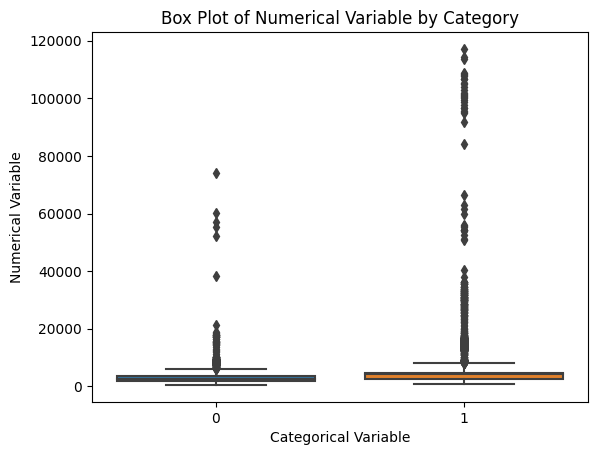

In [25]:
import seaborn as sns

# Example box plot for a numerical variable across categories
sns.boxplot(x='account_status', y='total_transaction_amount', data=train_df)
plt.xlabel('Categorical Variable')
plt.ylabel('Numerical Variable')
plt.title('Box Plot of Numerical Variable by Category')
plt.show()

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'customer_age'}>,
        <Axes: title={'center': 'customer_sex'}>,
        <Axes: title={'center': 'customer_number_of_dependents'}>,
        <Axes: title={'center': 'customer_salary_range'}>],
       [<Axes: title={'center': 'customer_relationship_length'}>,
        <Axes: title={'center': 'customer_available_credit_limit'}>,
        <Axes: title={'center': 'total_products'}>,
        <Axes: title={'center': 'period_inactive'}>,
        <Axes: title={'center': 'contacts_in_last_year'}>],
       [<Axes: title={'center': 'credit_card_debt_balance'}>,
        <Axes: title={'center': 'remaining_credit_limit'}>,
        <Axes: title={'center': 'transaction_amount_ratio'}>,
        <Axes: title={'center': 'total_transaction_amount'}>,
        <Axes: title={'center': 'total_transaction_count'}>],
       [<Axes: title={'center': 'transaction_count_ratio'}>,
        <Axes: title={'center': 'average_utilization'}>

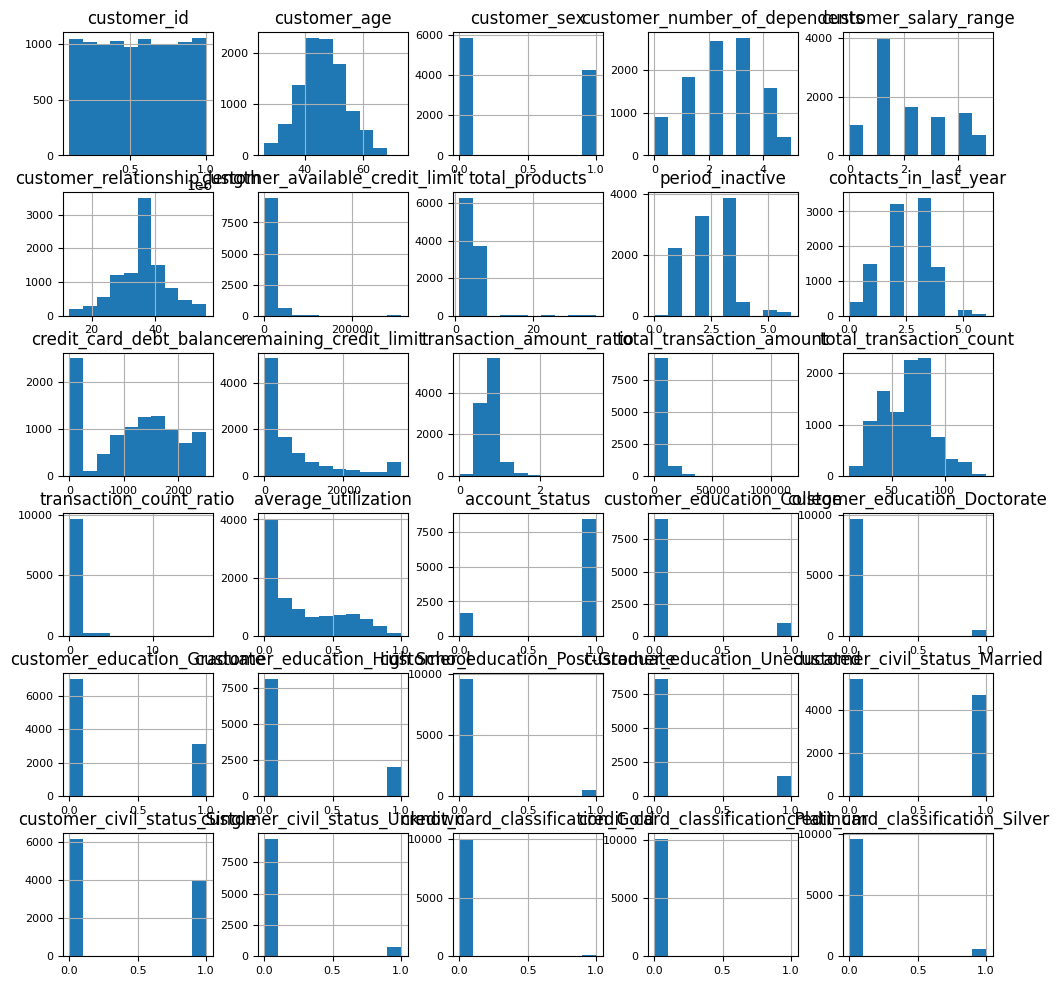

In [30]:
train_df_encoded.hist(figsize=(12,12),  xlabelsize=8, ylabelsize=8)

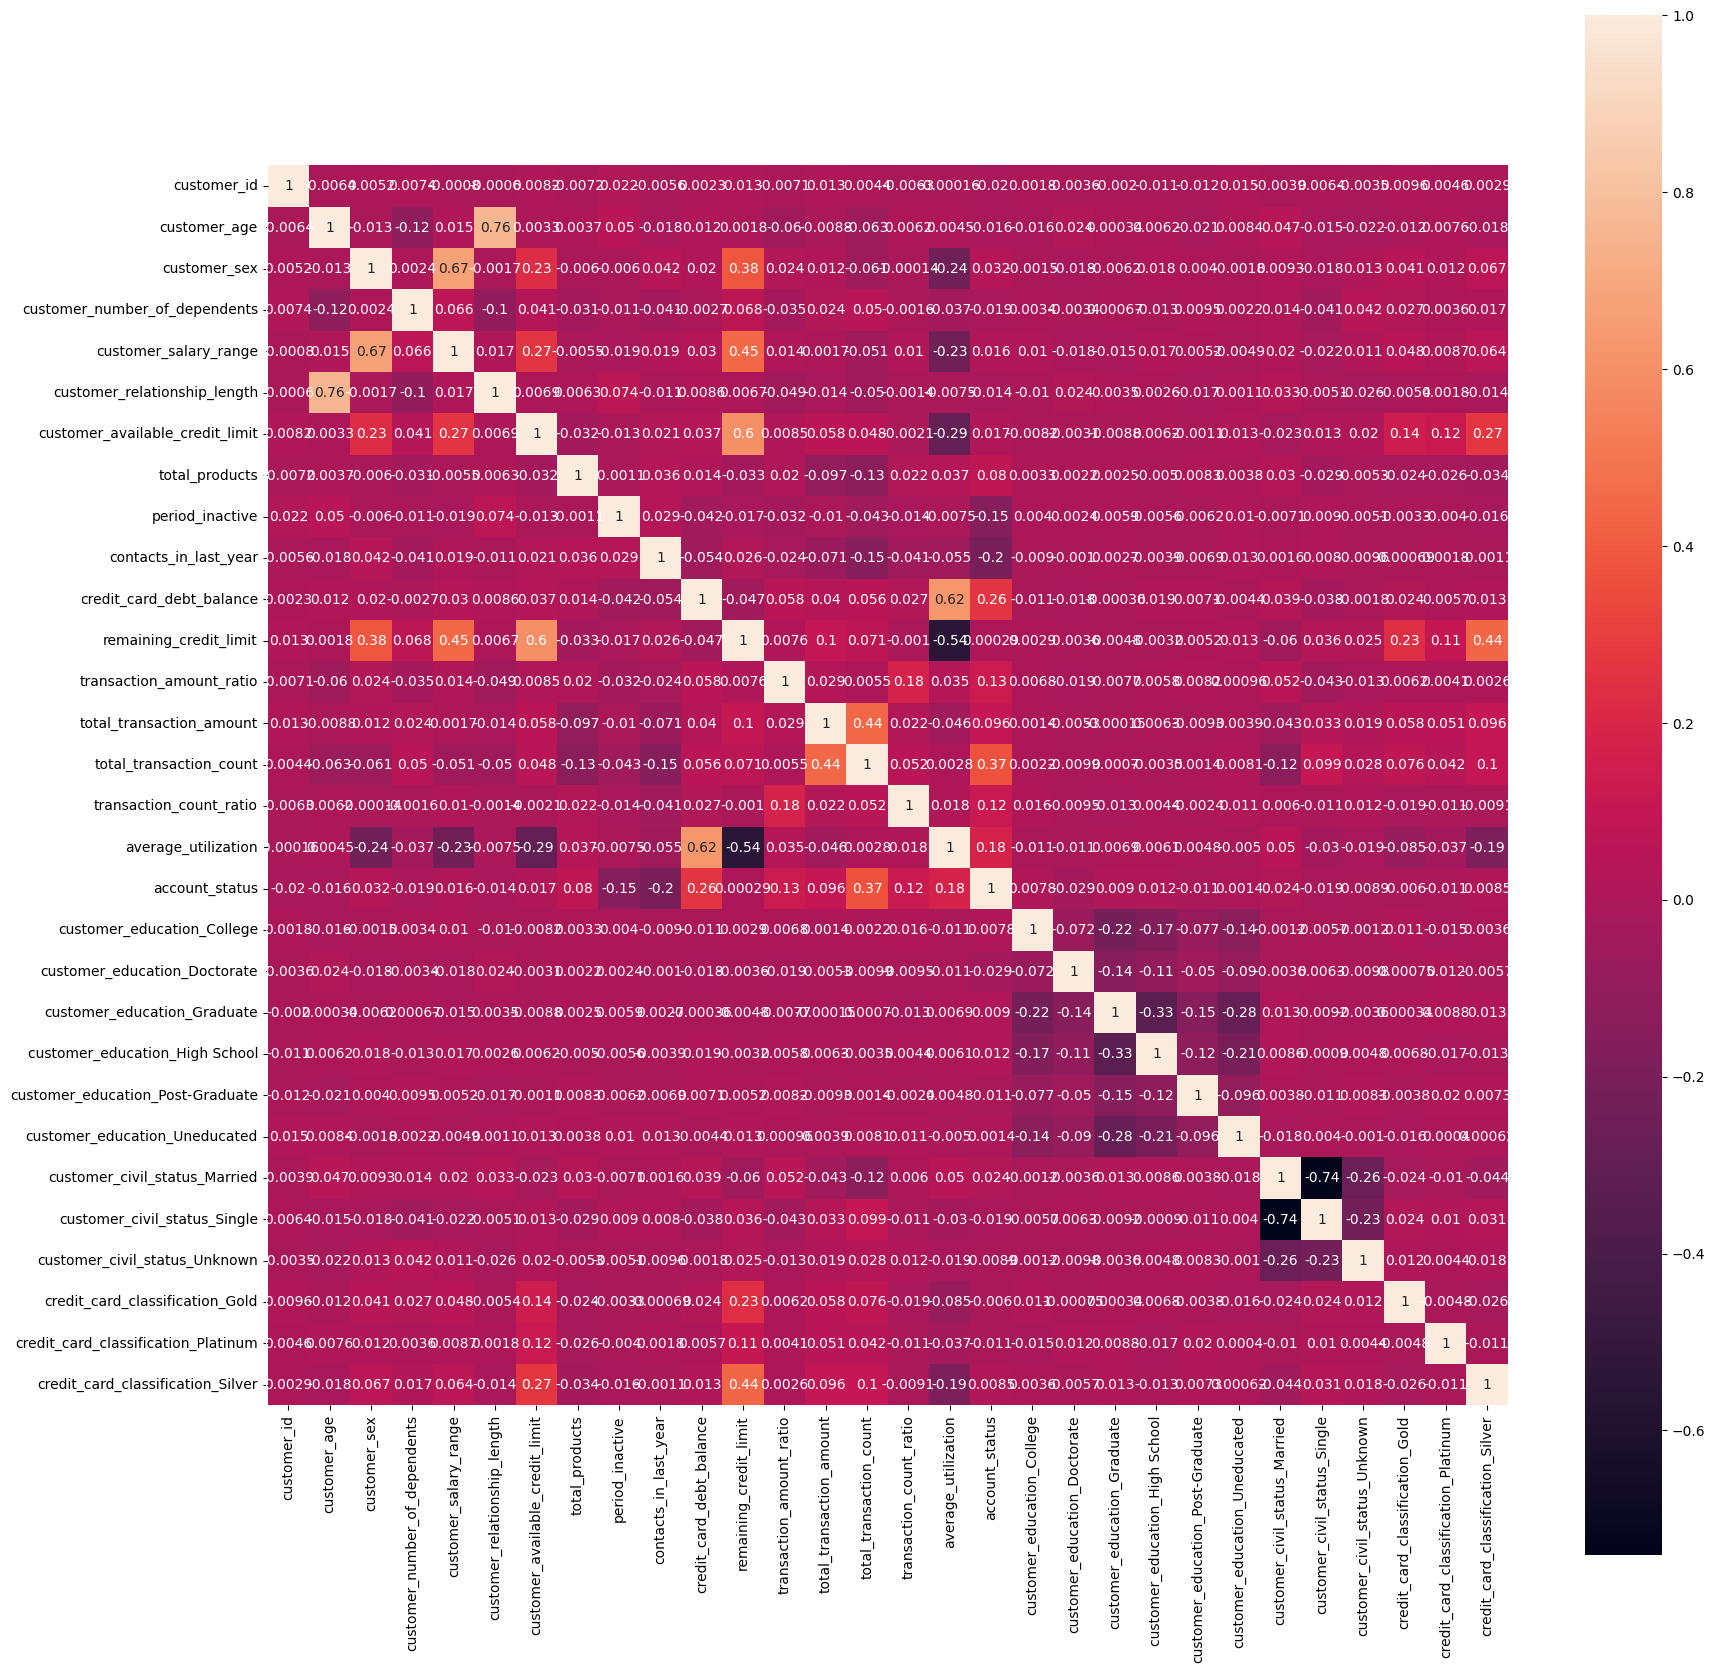

In [57]:
corrmat =  train_df_encoded.corr()

plt.figure(1 ,figsize = (20 , 20))
sns.heatmap(corrmat, annot = True , square  = True)
plt.show()

In [33]:
np.random.seed(0)
df_train, df_test = train_test_split(train_df_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['customer_age', 'customer_number_of_dependents', 'customer_salary_range', 'customer_relationship_length', 'customer_available_credit_limit','total_products','period_inactive',"contacts_in_last_year",
            "credit_card_debt_balance", "remaining_credit_limit", "total_transaction_amount", "total_transaction_count" ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_salary_range,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_education_College,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
5219,832095,0.55,0,0.20,0.20,0.74,0.00,0.11,0.33,0.50,0.00,0.05,0.72,0.03,0.50,3.33,0.00,1,0,0,0,0,0,1,0,1,0,0,0,0
7568,566489,0.47,0,0.40,0.40,0.53,0.02,0.00,0.33,0.33,0.65,0.21,0.73,0.12,0.78,0.80,0.18,1,0,1,0,0,0,0,1,0,0,0,0,0
3903,358674,0.28,0,0.60,0.20,0.47,0.00,0.03,0.17,0.33,0.00,0.05,0.78,0.06,0.59,0.69,0.00,1,0,0,0,1,0,0,0,1,0,0,0,0
8257,947365,0.00,1,0.00,0.20,0.00,0.03,0.03,0.17,0.17,0.00,0.30,0.51,0.03,0.45,0.84,0.00,1,0,0,0,0,0,0,0,0,1,0,0,1
9758,568545,0.49,1,0.60,0.20,0.58,0.02,0.11,0.50,0.17,0.79,0.17,0.65,0.03,0.56,0.61,0.25,1,1,0,0,0,0,0,0,1,0,0,0,0


In [38]:
df_train=df_train.drop(["customer_id"], axis=1)
df_test=df_test.drop(["customer_id"], axis=1)

In [39]:
y_train = df_train.pop('account_status')
X_train = df_train

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
X_train.columns[rfe.support_]
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,customer_sex,customer_number_of_dependents,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,customer_education_Doctorate,customer_education_Post-Graduate,customer_civil_status_Married,customer_civil_status_Unknown,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
5219,0,0.20,0.00,0.11,0.33,0.50,0.00,0.05,0.72,0.03,0.50,3.33,0.00,0,0,0,0,0,0,0
7568,0,0.40,0.02,0.00,0.33,0.33,0.65,0.21,0.73,0.12,0.78,0.80,0.18,1,0,1,0,0,0,0
3903,0,0.60,0.00,0.03,0.17,0.33,0.00,0.05,0.78,0.06,0.59,0.69,0.00,0,0,0,0,0,0,0
8257,1,0.00,0.03,0.03,0.17,0.17,0.00,0.30,0.51,0.03,0.45,0.84,0.00,0,0,0,1,0,0,1
9758,1,0.60,0.02,0.11,0.50,0.17,0.79,0.17,0.65,0.03,0.56,0.61,0.25,0,0,0,0,0,0,0


In [50]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [51]:
X_train_new = build_model(X_train_rfe,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:         account_status   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     147.8
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        16:13:50   Log-Likelihood:                -1726.1
No. Observations:                7088   AIC:                             3494.
Df Residuals:                    7067   BIC:                             3638.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Features,VIF
0,const,43.08
8,remaining_credit_limit,2.94
13,average_utilization,2.87
7,credit_card_debt_balance,2.06
3,customer_available_credit_limit,1.58
11,total_transaction_count,1.34
20,credit_card_classification_Silver,1.34
10,total_transaction_amount,1.27
1,customer_sex,1.23
16,customer_civil_status_Married,1.10


In [53]:
X_train_new = X_train_new.drop(["remaining_credit_limit"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:         account_status   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     155.4
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:18   Log-Likelihood:                -1727.6
No. Observations:                7088   AIC:                             3495.
Df Residuals:                    7068   BIC:                             3632.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Features,VIF
0,const,42.38
12,average_utilization,2.18
7,credit_card_debt_balance,1.90
10,total_transaction_count,1.33
3,customer_available_credit_limit,1.29
9,total_transaction_amount,1.27
1,customer_sex,1.15
19,credit_card_classification_Silver,1.15
15,customer_civil_status_Married,1.10
16,customer_civil_status_Unknown,1.08


In [54]:
X_train_new = X_train_new.drop(["average_utilization"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:         account_status   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     163.5
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        16:17:21   Log-Likelihood:                -1731.2
No. Observations:                7088   AIC:                             3500.
Df Residuals:                    7069   BIC:                             3631.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Features,VIF
0,const,41.97
10,total_transaction_count,1.33
9,total_transaction_amount,1.26
3,customer_available_credit_limit,1.19
18,credit_card_classification_Silver,1.12
14,customer_civil_status_Married,1.10
15,customer_civil_status_Unknown,1.08
1,customer_sex,1.07
6,contacts_in_last_year,1.04
8,transaction_amount_ratio,1.03


In [55]:
X_train_new = X_train_new.drop(["total_transaction_count"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:         account_status   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     84.84
Date:                Fri, 19 May 2023   Prob (F-statistic):          4.82e-269
Time:                        16:17:36   Log-Likelihood:                -2306.9
No. Observations:                7088   AIC:                             4650.
Df Residuals:                    7070   BIC:                             4773.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

,Features,VIF
0,const,33.89
3,customer_available_credit_limit,1.19
17,credit_card_classification_Silver,1.11
13,customer_civil_status_Married,1.08
14,customer_civil_status_Unknown,1.08
1,customer_sex,1.06
9,total_transaction_amount,1.04
8,transaction_amount_ratio,1.03
10,transaction_count_ratio,1.03
15,credit_card_classification_Gold,1.03
